# Week 2 Programming Homework

This week we will look at computing similarity between points and membership in a concept.

We will:
1. Generate some data (or import your own)
2. Compute similarities between points in the space
3. Compute membership values of points in concepts and their negations using the prototype-threshold model of concepts


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math

%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

# setting seed for reproducibility
# np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


## Data generation (10 pts)
We will generate some data that is centered on prototypes. 
Set up an empty dictionary to store the prototypes (1 pt)

Use the specified list of 4 prototypes and standard deviations.

Sample data from spherical multivariate normal distributions, i.e. with mean corresponding to the prototype and covariance matrix $\sigma_i$ times the identity matrix. See the code from last week for a hint. (4 pts)

Discard points that are more than 2 standard deviations from the mean. This means you should calculate the distance from the point to the prototype and discard if greater than 2 times the standard deviation associated with that prototype. (5 pts)

In [38]:
# generate datapoints
data = {}
prototypes = np.array([[3, 3], [4, 3], [7, 5], [5, 7]])
stdevs = np.array([1, 0.7, 1, 1])
k = len(prototypes)

for i in range(k):
    x, y = np.random.multivariate_normal(prototypes[i], (stdevs[i]**2)*np.eye(2), 100).T
    xyList = np.array([x,y])
    data[i] = xyList.T    

In [39]:
# euclidean function to calculate the distance
def euc_dist(x, y):
    return (np.sqrt(sum((x-y)**2)))

In [40]:
# discard all points which are > 2*stdev
for j in data:
    pos = -1
    for point in data[j]:
        pos+=1
        if euc_dist(point,prototypes[j]) > stdevs[j]*2:
            data[j] = numpy.delete(data[j],(pos), axis = 0)
            pos-=1

## Plot the data (5 pts)

Plot the data you have generated and the prototypes.


(0.7210466636546187, 9.252899675832436, 0.796370670378514, 9.353383403931577)

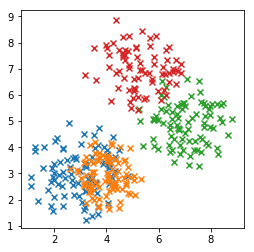

In [41]:
# 1. initialize a figure and an axis
fig, ax = plt.subplots()
# 2. Set up a for loop to iterate over the keys of the dictionary.
for key in data:
    # plt.scatter(")" takes a list of x values and a list of y values, 
    # so we assign the transpose of the datapoints to the tuple (x, y)
    (x, y) = data[key].T
    plt.scatter(x, y, marker = 'x')

    # For each key, plot the values stored at that key using plt.scatter
plt.axis('equal')

## Calculating similarity (12 pts)

Write a function to calculate the similarity between two points, according to the equation given in the lectures, i.e.
$$ sim(x, y) = e^{-cd(x, y)} $$ The function should take two 2-dimensional points, and a parameter specifying the speed of decay as input and return a number between 0 and 1. Assume the distance metric is Euclidean. (5 pts)

Calculate the similarity between each pair of prototypes, assuming a decay constant of 1. (5pts) 

Output the results in a readable format. (2 pts)

In [42]:
# function to calculate the similarity
def similarity(x,y):
    sim = math.exp((-1*euc_dist(x,y)))
    return sim

# output the results, similarity between prototypes:
# it also calculates the similarity with itself to check if it works
# if sim = 1 it means that the point is itself
for prototype in prototypes:
    for k in range(len(prototypes)):
        sim = similarity(prototype,prototypes[k])
        print('The similarity between '+str(prototype)+' and '+str(prototypes[k])+ ' is '+ str(sim))

The similarity between [3 3] and [3 3] is 1.0
The similarity between [3 3] and [4 3] is 0.36787944117144233
The similarity between [3 3] and [7 5] is 0.01142289099346694
The similarity between [3 3] and [5 7] is 0.01142289099346694
The similarity between [4 3] and [3 3] is 0.36787944117144233
The similarity between [4 3] and [4 3] is 1.0
The similarity between [4 3] and [7 5] is 0.02717246117223556
The similarity between [4 3] and [5 7] is 0.016194143319162562
The similarity between [7 5] and [3 3] is 0.01142289099346694
The similarity between [7 5] and [4 3] is 0.02717246117223556
The similarity between [7 5] and [7 5] is 1.0
The similarity between [7 5] and [5 7] is 0.059105746561956225
The similarity between [5 7] and [3 3] is 0.01142289099346694
The similarity between [5 7] and [4 3] is 0.016194143319162562
The similarity between [5 7] and [7 5] is 0.059105746561956225
The similarity between [5 7] and [5 7] is 1.0


## Calculating membership in combinations of concepts (33 pts)

Write a function for calculating membership in the intersection of two concepts. The function should take in two membership values (numbers between 0 and 1) and return another membership value (3 pts)

In [43]:
# the intersection between two concepts is the min value
def memberIntersection(val1,val2):
    return min(val1,val2)

Suppose we consider membership to be similarity to a prototype. Are there any datapoints which have a greater similarity to the prototype of another concept? (2 pts)

If a datapoint from a concept is closer to the prototype of another concept than it is to its own prototype, it will have a greater similarity with that concept.

For each of the points in concepts 2 and 3, calculate their membership in the intersection of concepts 2 and 3.
1. For each point, calculate the membership in each concept using the idea that membership in a concept is similarity to a prototype (4 pts)
2. Calculate the membership in the combined concept (3 pts)
3. Store the membership values in a list (1 pt)

In [44]:
# initialize dict and list
memvalcombine = []
pointmemval = {}

# for every point in concept 2 
for point in data[2]:
    #1. calculate the similarity/membership with concept 2
    val1 = similarity(point, prototypes[2])
    #2. calculate the similarity/membership with concept 3
    val2 = similarity(point, prototypes[3])
    #3. calculate the similarity/membership with combined concepts and store the result
    memvalcombine.append(memberIntersection(val1,val2))
    pointmemval[tuple(point)] = memberIntersection(val1,val2)
    
# for every point in concept 2     
for point in data[3]:
    #1. calculate the similarity/membership with concept 2
    val1 = similarity(point, prototypes[2])
    #2. calculate the similarity/membership with concept 3
    val2 = similarity(point, prototypes[3])
    memvalcombine.append(memberIntersection(val1,val2))
    #3. calculate the similarity/membership with combined concepts and store the result
    pointmemval[tuple(point)] = memberIntersection(val1,val2)

Sort the list of membership values and plot them, preserving the original list of memberships. (2 pts)

You should see a change in the gradient of the line. Use this change to decide on a value that determines membership in the combined concept. (2 pts) 

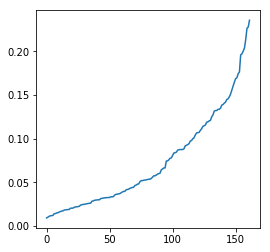

In [45]:
# 1. initialize a figure and an axis
fig2, ax2 = plt.subplots()
# 2. Set up a for loop to iterate over the keys of the dictionary.
sortedlist = sorted(memvalcombine)
plt.plot(sortedlist)

Explain which value you have chosen ---- Around 0.15 the gradient changes to its steepest, so this will be the threshhold value

Filter out the points that have too low a membership and plot the points with high enough menmbership on the previous axis (6 pts)

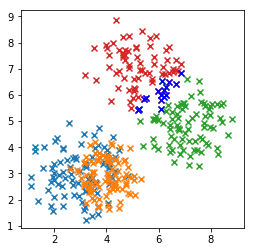

In [46]:
#initialze empty list  
filteredlist = []

# filter out the points below the threshhold
for point in pointmemval:
    if pointmemval[point] > 0.15:
        filteredlist.append(np.array(point))
    
# plot the filtered points
for point in filteredlist:
    (x,y) = point
    ax.scatter(x, y, marker = 'x', color = 'b')
fig

Form a new prototype based on the elements of the combined concept and plot on the existing axis. Hint: look at the exercises from last week (5 pts)

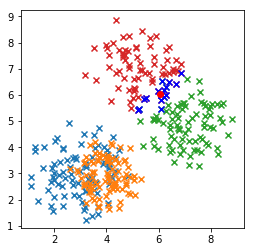

In [47]:
# calculate the new prototype/centroid of thge combine concept
(xN, yN) = np.sum(filteredlist, axis = 0)
centroid = [xN/len(filteredlist), yN/len(filteredlist)]

# plot the new centroid/prototype
ax.plot(centroid[0],centroid[1], marker = 'o', color = 'r')
fig

Calculate the membership of the points in the new combined concept. Are they greater than the membership in the interstection of concept 2 and concept 3 in general? (5 pts)

In [48]:
# calculate the membership in the new combined concept
memvalnewcentroid = 0
for point in filteredlist:
    memvalnewcentroid += similarity(point,centroid)
    
print('The average membership value in the new combined concept is: ' +str(memvalnewcentroid/len(filteredlist)))
print('The average membership value in the intersection is: '+str(sum(memvalcombine)/len(memvalcombine)))

The average membership value in the new combined concept is: 0.629812431605123
The average membership value in the intersection is: 0.07295262029026665


## Prototype - threshold concepts (40 pts)
Write a function that calculates the membership of a point in a concept based on Lawry and Tang's prototype-threshold model of concepts. Assume distances are calculated using Euclidean distance, and that the threshold $\epsilon$ is uniformly distributed over an interval $[0, k]$ where $k$ is a positive real number.
(6 pts)

Note: 
Membership in a concept $A$ is given by:
$$ \mu_A(x) = P(d(x,p_A) \leq \epsilon) $$

If the threshold $\epsilon$ is uniformly distributed over the interval $[0, k]$, then the probability that $d(x, p_A) \leq\epsilon$ is just 
$$
1 - \frac{d(x, p_A)}{k}
$$

The function should take as input a point $x$ represented as a numpy array of shape (2, ), a prototype $p$ represented as a numpy array of shape (2, ), and a number $k$ representing the highest value of the threshold, and it should return the membership of the point in the concept.

1. Calculate the distance of the point to the prototype
2. Calculate the membership of the point in the concept
3. Return the membership of the point in the concept.


In [49]:
# function to calculate the membership of a point in a concept based on the prototype-threshold model
def calcMembership(point, prototype,k):
    #calculate the distance
    d = euc_dist(point,prototype)
    # filter out (negative)values
    if 0 <= d <= k:
        return (1-(d/k))
    else:
        return 0

Write a function that calculates the membership in the negation of a concept. The function should take a number between $0$ and $1$ as input, and return a number between $0$ and $1$. (4 pts)



In [50]:
# function that calculates negation of a concept
def negationMembership(value):
    return 1-value

Initialize a dictionary with concept labels 0 and 1 and their negations as keys in which to store classified points (2 pts)

In [51]:
# initialize dictionary to store classified points
datadict = {}
datadict.fromkeys([0, 1, 2, 3])

{0: None, 1: None, 2: None, 3: None}

Generate 200 new datapoints uniformly distributed across the bottom corner of the space $[0, 5]\times[0,5]$. (2 pts)

In [52]:
# generate 200 new data points in the [0,5] x [0,5] space
new0 = np.random.rand(200, 1)*5
new1 = np.random.rand(200, 1)*5
new_data = hstack([new0, new1]) 

For each new datapoint, calculate its membership in each of concepts 0 and 1 and in their negations. Assign the datapoints to concepts or negation of concepts according to which has the maximum value. (12 pts)

To calculate the membership in each concept, use the function you wrote. The maximum threshold $k$ is 2 times the standard deviation as stored in the variable `stdevs` for each concept.

In [53]:
# initialize empty list
c0 = []
c1 = []
nc0 = []
nc1 = []

# for every point of the 200 new points --
for point in new_data:
    #1. calculate the membership in concept 0
    memval0 = calcMembership(point,prototypes[0],stdevs[0]*2)
    #2. calculate the membership in concept 1
    #i changed the stdevs for concept 1 to 0.7 from 0.3 because otherwise it would only have 0 to a few points
    memval1 = calcMembership(point,prototypes[1],stdevs[1]*2)
    # if the membership of concept 0 is bigger, discard membership of concept 1
    if memval0 > memval1:
        #calculate the membership in the negation of concept 0
        negval0 = negationMembership(memval0)
        #check which membership is greater and store the point in that concept
        if memval0 > negval0:
            c0.append(point)
        else:
            nc0.append(point)
            
    # if the membership of concept 1 is bigger, discard membership of concept 0      
    elif memval1 > memval0:
        #calculate the membership in the negation of concept 1
        negval1 = negationMembership(memval1)
        #check which membership is greater and store the point in that concept
        if memval1 > negval1:
            c1.append(point)
        else:
            nc1.append(point)
    
    # if both memberships in concept 0 and concept 1 are 0 store the points in its negations
    else:
        nc0.append(point)
        nc1.append(point)

# store the points with their concept
datadict[0] = c0
datadict[1] = c1
datadict[2] = nc0
datadict[3] = nc1

Set up a new axis. Plot the original datapoints using the colours `['tab:blue', 'tab:orange', 'tab:green', 'tab:red']`. Plot the prototypes in black. Plot the new datapoints. Use the same colours, and the same marker style for the positive concepts, and use the same colour but a different marker style for the negated concepts. (12 pts)

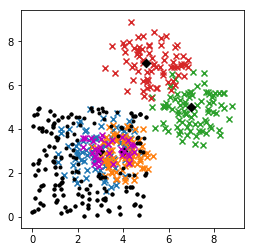

In [54]:
# set up a new axis
fig5, ax5 = plt.subplots()
# 2. Set up a for loop to iterate over the keys of the dictionary.
for key in data:
    # plt.scatter(")" takes a list of x values and a list of y values, 
    # so we assign the transpose of the datapoints to the tuple (x, y)
    (x, y) = data[key].T
    plt.scatter(x, y, marker = 'x')

# plot the prototypes as black diamonds    
for prototype in prototypes:
    (x,y) = prototype
    ax5.scatter(x, y, marker = 'D', color = 'black')

# plot positive concepts as magnenta x's
for point in c1:
    (x,y) = point
    ax5.scatter(x, y, marker = 'x', color = 'm')
for point in c0:
    (x,y) = point
    ax5.scatter(x, y, marker = 'x', color = 'm')

# plot negative concepts as black dots
for point in nc0:
    (x,y) = point
    ax5.scatter(x, y, marker = '.', color = 'black')
for point in nc1:
    (x,y) = point
    ax5.scatter(x, y, marker = '.', color = 'black')